<a href="https://colab.research.google.com/github/KimyYoungWook/DataScience/blob/main/pandas_%EC%9D%B8%EA%B5%AC%EA%B5%AC%EC%A1%B0_%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

문제 정의 : 전국에서 신도림동의 연령별 인구 구조와 가장 형태가 비슷한 지역은 어디일까

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


1.데이터를 읽어 온다

In [ ]:
import pandas as pd
df= pd.read_csv('age.csv',index_col=0)
df.tail()

In [ ]:
df.info()

인구수 -> 인구비율로 전처리

In [ ]:
df= df.div(df['총인구수'],axis =0) # 전체 데이터를 총인구수로 나눠서 비율로 변화

In [ ]:
del df['총인구수'], df['연령구간인구수'] # 총인구수, 연령구간인구수 열삭제
df.head()

In [ ]:
df.head()

2. 궁금한 지역의 이름을 입력 받는다.

In [ ]:
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')
a = df.index.str.contains(name)# 3. 해당 행의 인덱스를 찾기
df2 =df[a]
df2.head()

궁금한 지역 인구구조 시각화

In [ ]:
plt.rcParams['figure.figsize']=(10,4)
plt.rcParams['figure.dpi']=200
plt.style.use('ggplot')# 격자 무늬 스타일로 지정 classic, dark_background
df2.T.plot() #  T : 전치
plt.show()

In [ ]:
df.sub(df2.iloc[0],axis=1) # home-away

In [ ]:
df.loc[df.sub(df2.iloc[0],axis=1).abs().sum(axis=1).sort_values().index[1:6]].T.plot()
plt.show()

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 보람동


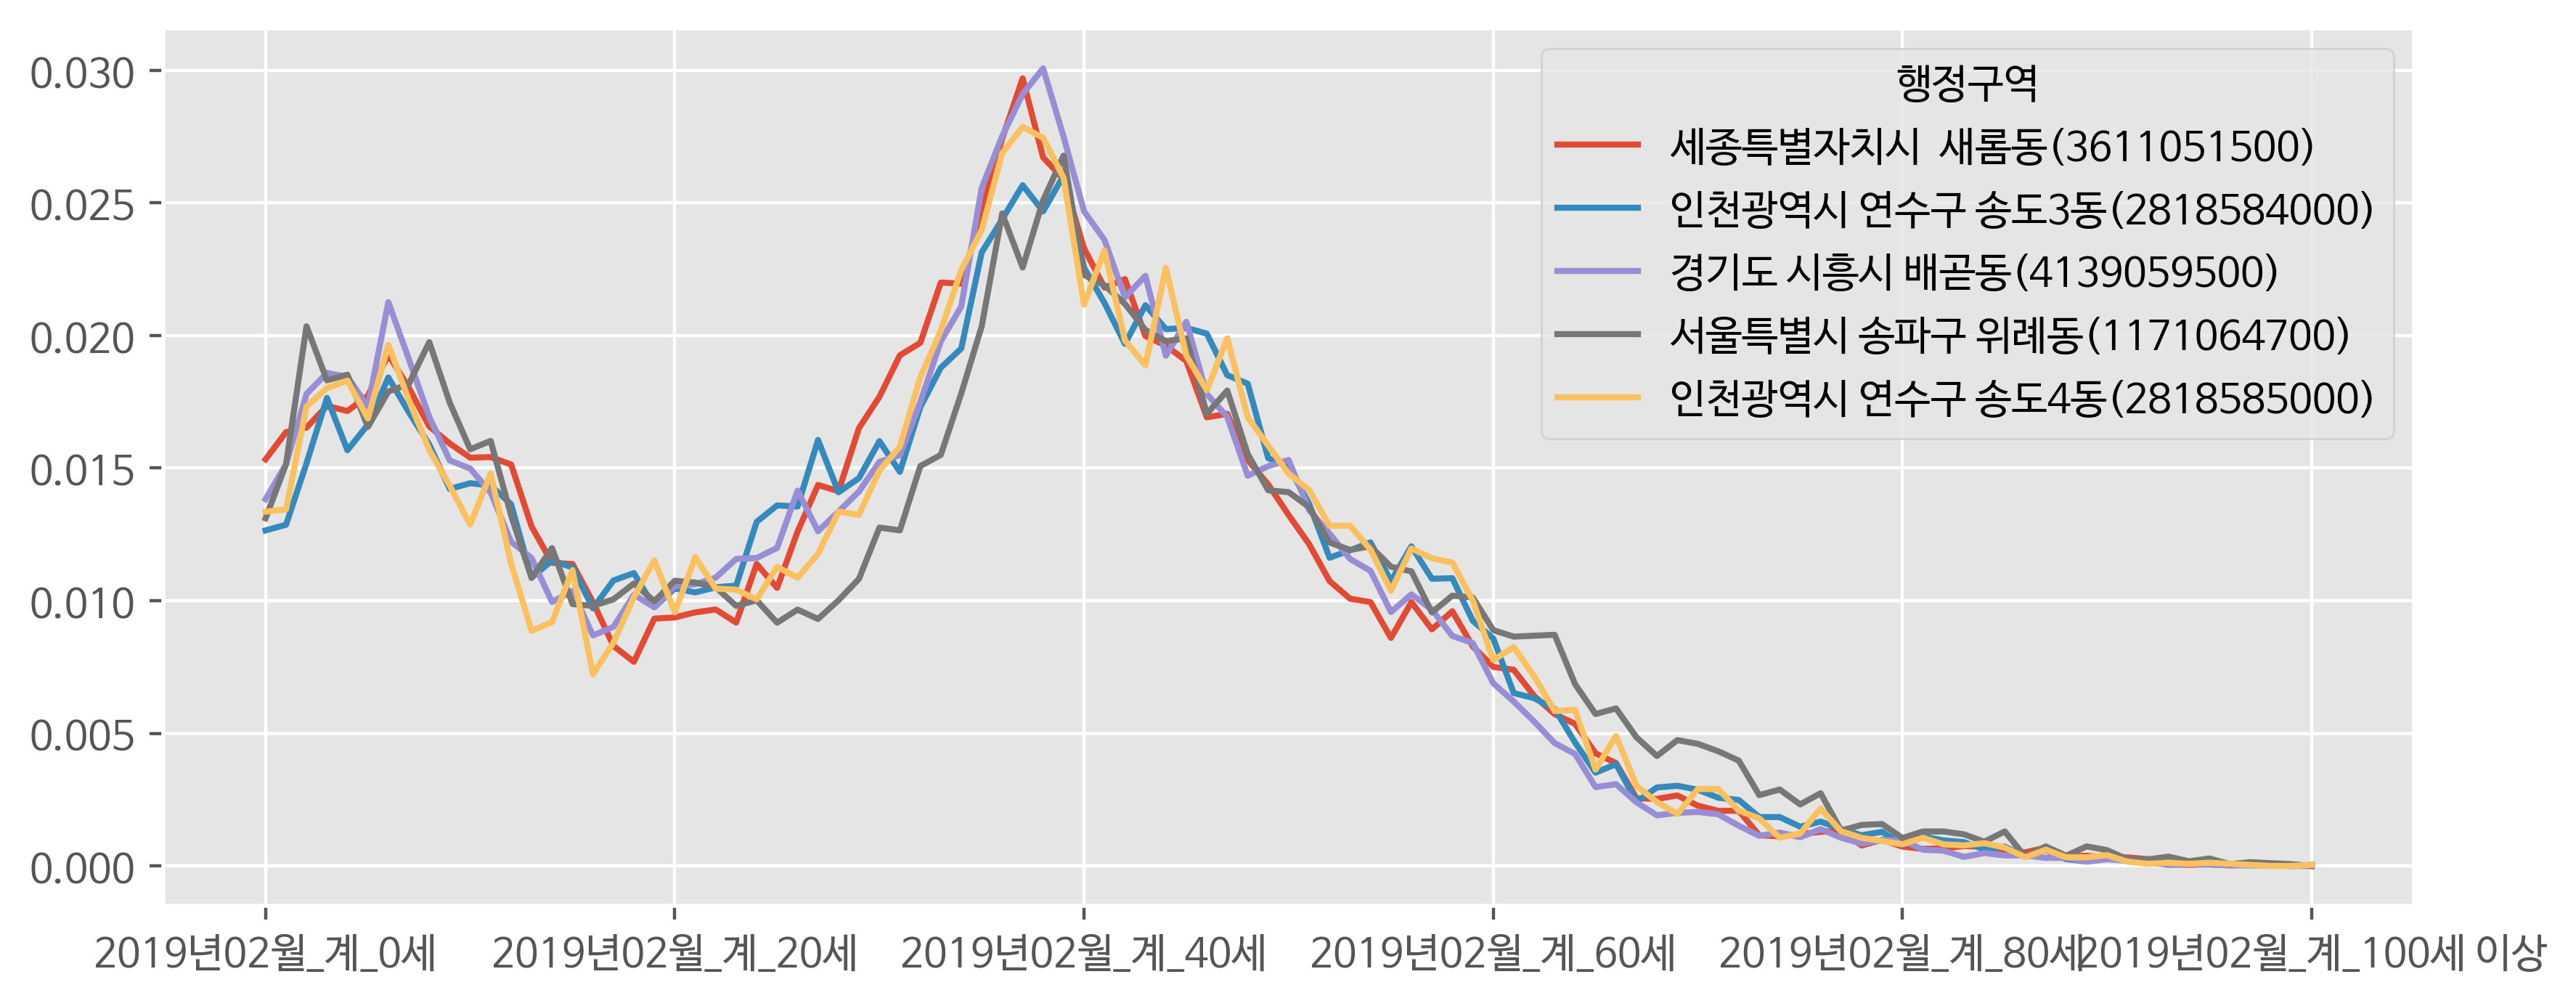

In [ ]:
import pandas as pd
#데이터 가져오기
df= pd.read_csv('age.csv',index_col=0)

 # 전체 데이터를 총인구수로 나눠서 비율로 변환
df= df.div(df['총인구수'],axis =0)

# 총인구수, 연령구간인구수 열삭제(연산에 필요없음)
del df['총인구수'], df['연령구간인구수'] 

#원하는 지역이름 입력
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')

# 입력한 지역 행의 인덱스를 찾기
a = df.index.str.contains(name)

#구한 인덱스로 원하는 지역 데이터 만들기
df2 =df[a]

# 차트 옵션
plt.rcParams['figure.figsize']=(10,4)
plt.rcParams['figure.dpi']=200
plt.style.use('ggplot')# 격자 무늬 스타일로 지정 classic, dark_background

#차트 그리기  
df.loc[df.sub(df2.iloc[0],axis=1).abs().sum(axis=1).sort_values().index[1:6]].T.plot()
# axis = 1(열) 0(행) sum:더하고 abs():절대값 취해주고 sort_valuse() :정렬하고 index[1:6]: 자신을 제외한 비슷한도시 Top5 슬라이싱 T: 전치 
plt.show()